### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pickle
%matplotlib inline
sns.set()

from pandas import Series,DataFrame
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

### 2. loading datasets:
For existing employees and those who left.

In [2]:
existing = pd.read_excel("existing.xlsx")
left = pd.read_excel("left.xlsx")

### 3. Adding status columns for both datasets

In [3]:
existing['status'] = "exist"
left['status'] = "left"

In [4]:
existing.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,exist
1,2002,0.82,0.67,2,202,3,0,0,sales,low,exist
2,2003,0.45,0.69,5,193,3,0,0,sales,low,exist
3,2004,0.78,0.82,5,247,3,0,0,sales,low,exist
4,2005,0.49,0.60,3,214,2,0,0,sales,low,exist


In [5]:
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left


In [6]:
left.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [7]:
existing.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


#### Checking for null values

In [8]:
left.isna().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
status                   False
dtype: bool

In [9]:
existing.isna().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
status                   False
dtype: bool

### 4. Creating a dataframe for all employees

In [10]:
allEmployees = pd.concat([existing,left])
allEmployees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,exist
1,2002,0.82,0.67,2,202,3,0,0,sales,low,exist
2,2003,0.45,0.69,5,193,3,0,0,sales,low,exist
3,2004,0.78,0.82,5,247,3,0,0,sales,low,exist
4,2005,0.49,0.60,3,214,2,0,0,sales,low,exist


In [11]:
allEmployees.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
3566,14995,0.40,0.57,2,151,3,0,0,support,low,left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,left
3570,14999,0.37,0.52,2,158,3,0,0,support,low,left


In [12]:
for isduplicate in allEmployees.duplicated().array:
    
    #droping all duplicates if any duplicated instance is found
    if isduplicate:
        print("Duplicates identified and dropped")
        allEmployees.drop_duplicates(inplace=True)
        
        break
    
    else:
        pass
            
print("This shows no duplicates available now..")

#showing duplicates status
allEmployees[allEmployees.duplicated()==True]        

This shows no duplicates available now..


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status


In [13]:
#correcting the wrongly spelled column name
allEmployees.rename(columns={"average_montly_hours": "average_monthly_hours"}, inplace=True)
allEmployees.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'status'],
      dtype='object')

### 5. Exploring allEmployees dataset
**AIM 1:** What type of employees are leaving? 

In [14]:
#getting number of employees in each status category
allEmployees['status'].value_counts()

exist    11428
left      3571
Name: status, dtype: int64

In [15]:
#obtaining the number of employees in each status category for each dept
byDept = pd.crosstab(allEmployees.status,allEmployees.dept,margins=True)
byDept

dept,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
status,,,,,,,,,,,
exist,954,666,563,524,539,655,704,3126,1674,2023,11428
left,273,121,204,215,91,203,198,1014,555,697,3571
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


In [16]:
#transposing byDept 
byDept = byDept.transpose()
byDept

status,exist,left,All
dept,,,
IT,954,273,1227
RandD,666,121,787
accounting,563,204,767
hr,524,215,739
management,539,91,630
marketing,655,203,858
product_mng,704,198,902
sales,3126,1014,4140
support,1674,555,2229


In [17]:
#removing the row and column labelled All
def droping_All(dataframe):
    df = dataframe
    for i in range(2):
        df.drop("All", axis=i,inplace = True)
    return df      

In [18]:
#droping row and column labelled All
droping_All(byDept)

status,exist,left
dept,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [19]:
#Identifying departments with the highest percentage of leaving employees
byDept['percentage_left'] = (byDept.left/byDept.left.sum())*100

#sorting them in descending order
byDept.sort_values(ascending=False, by ='percentage_left')

status,exist,left,percentage_left
dept,,,
sales,3126,1014,28.395407
technical,2023,697,19.518342
support,1674,555,15.541865
IT,954,273,7.644917
hr,524,215,6.020722
accounting,563,204,5.712686
marketing,655,203,5.684682
product_mng,704,198,5.544665
RandD,666,121,3.388407


byDept table above shows that **sales, technical, support, IT** in that order, registers the highest number of leaving employees.

In [20]:
#obtaining the number of employees in each status category for each salary rating
bySalary = pd.crosstab(allEmployees.status,allEmployees.salary,margins=True)
bySalary

salary,high,low,medium,All
status,,,,
exist,1155,5144,5129,11428
left,82,2172,1317,3571
All,1237,7316,6446,14999


In [21]:
#transposing bySalary 
bySalary = bySalary.transpose()
bySalary

status,exist,left,All
salary,,,
high,1155,82,1237
low,5144,2172,7316
medium,5129,1317,6446
All,11428,3571,14999


In [22]:
#droping row and column labelled All
droping_All(bySalary)

status,exist,left
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [23]:
#Identifying departments with the highest percentage of leaving employees
bySalary['percentage_left'] = (bySalary.left/bySalary.left.sum())*100

#sorting them in descending order
bySalary.sort_values(ascending=False, by ='percentage_left')

status,exist,left,percentage_left
salary,,,
low,5144,2172,60.823299
medium,5129,1317,36.880426
high,1155,82,2.296276


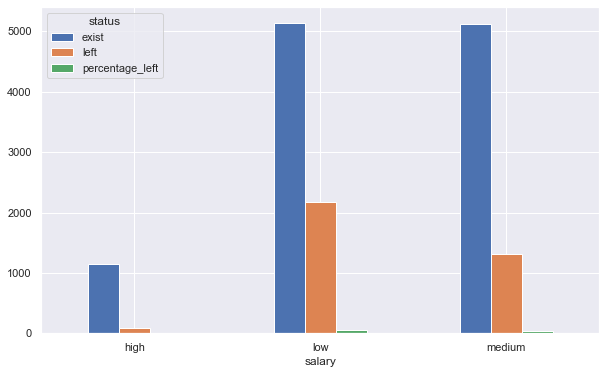

In [73]:
bySalary.plot(kind = 'bar', figsize=(10,6)).tick_params(axis='x', labelrotation = 0)

bySalary plot above shows that employees on a **low** salary scale, registers the highest number of leaving employees.

In [25]:
#obtaining the number of employees on each salary scale in each dept
deptSalary = pd.crosstab(allEmployees.dept,allEmployees.salary,margins=True)
deptSalary

salary,high,low,medium,All
dept,,,,
IT,83,609,535,1227
RandD,51,364,372,787
accounting,74,358,335,767
hr,45,335,359,739
management,225,180,225,630
marketing,80,402,376,858
product_mng,68,451,383,902
sales,269,2099,1772,4140
support,141,1146,942,2229


In [26]:
#droping row and column labelled All
droping_All(deptSalary)

salary,high,low,medium
dept,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [27]:
#sorting them in descending order by low, medium then high 
deptSalary.sort_values(ascending=False,by=['low','medium','high'])

salary,high,low,medium
dept,,,
sales,269,2099,1772
technical,201,1372,1147
support,141,1146,942
IT,83,609,535
product_mng,68,451,383
marketing,80,402,376
RandD,51,364,372
accounting,74,358,335
hr,45,335,359


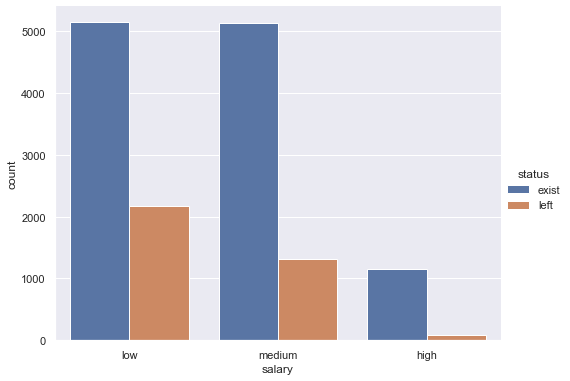

In [28]:
#representing number of employees on each salary rating for each status category
sns.catplot(x='salary',data=allEmployees,hue='status', kind='count', height=5.27, aspect=7/5.27)

The above catplot shows that employees on a **low** salary scale, registers the highest number of leaving employees.

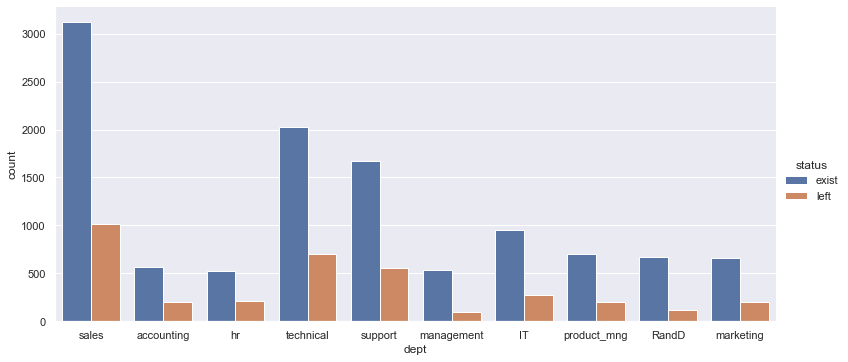

In [29]:
#representing number of employees from each department for each status category
sns.catplot(x='dept',data=allEmployees,hue='status', kind='count', aspect=13/6)

The above catplot shows that **sales, technical, support, IT** in that order, registers the highest number of leaving employees.

**AIM2:** Why employees are prone to leave?

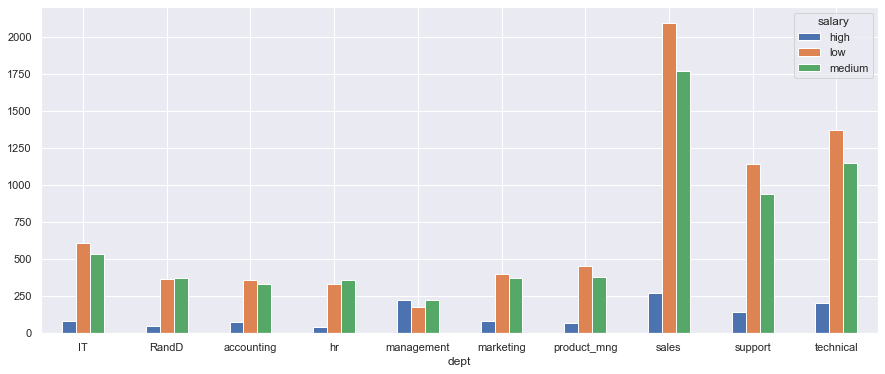

In [30]:
#representing number of employees on each salary scale for each department
deptSalary.plot( kind = 'bar', figsize=(15,6)).tick_params(axis='x', labelrotation = 0)

The above plot shows that departments **sales, technical, support and IT** have the highest number of employees on a low salary scale. This explains why these departments' employees are prone to leave.

In [31]:
#filtering out those who have left from sales, technical, support and IT departments
leavingType = left.loc[(left.dept=='sales')|(left.dept=='technical')|(left.dept=='support')|(left.dept=='IT')]
leavingType

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,left


In [32]:
#obtaining the mean value of each feature for each selected department
leavingReason = leavingType.groupby('dept')[['satisfaction_level','last_evaluation',
                                             'number_project', 'average_montly_hours', 
                                             'time_spend_company','Work_accident', 
                                             'promotion_last_5years',]].apply(lambda x : x.mean())

leavingReason

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
dept,,,,,,,
IT,0.411868,0.730037,4.025641,213.849817,3.860806,0.032967,0.010989
sales,0.447663,0.711243,3.736686,205.041420,3.812623,0.045365,0.006903
support,0.450901,0.727315,3.864865,205.636036,3.933333,0.055856,0.005405
technical,0.432525,0.734132,4.061693,214.183644,3.959828,0.047346,0.004304


In [33]:
#function to highlight the maximum value in each column of a passed dataframe
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if cell else '' for cell in is_max]

#function to highlight the miniumum value in each column of a passed dataframe
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: green' if cell else '' for cell in is_min]

***MinMaxScaling of the LeavingReason dataframe for ploting***

In [34]:
# creating a scaler object
scaler = MinMaxScaler()

# fit and transforming the data
leavingReason_norm = DataFrame(scaler.fit_transform(leavingReason), 
                               columns=leavingReason.columns).set_index(leavingReason.index)  #setting Columns and Indices

#applying the max_value highlight function
leavingReason_norm.style.apply(highlight_max)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
dept,,,,,,,
IT,0.000000,0.821080,0.889073,0.963485,0.327317,0.000000,1.000000
sales,0.917039,0.000000,0.000000,0.000000,0.000000,0.541656,0.388818
support,1.000000,0.702190,0.394387,0.065041,0.820016,1.000000,0.164737
technical,0.529221,1.000000,1.000000,1.000000,1.000000,0.628199,0.000000


***NOTE: 1***

-The **technical team** may be leaving because they are having the maximum activity rate yet they're not evaluated and promoted

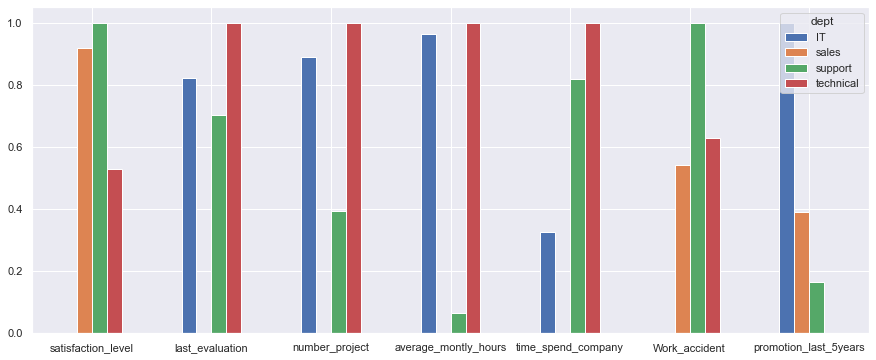

In [35]:
#Representing the level of each feature for the selected departments
leavingReason_norm.transpose().plot(kind = 'bar', figsize=(15,6)).tick_params(axis='x', labelrotation = 0)

***NOTE: 2***

-The **IT team** may be leaving because they are not satisfied with the experience at work

-Since **sales dept** have a considerable satisfaction_level and are promoted in comparision to others, may be they are just fired because of their inactiveness at the company.

-The **support team** has the highest satisfaction_level and reflects some level of promotion! Could be they are also just layed-off by the employer

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

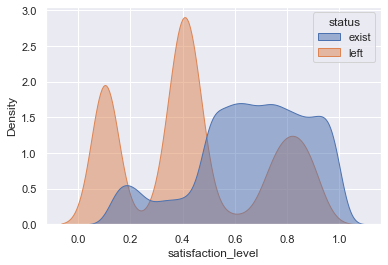

In [36]:
#representing the satisfaction_level of all employees by status
sns.kdeplot(data=allEmployees, x="satisfaction_level", hue="status",fill=True, common_norm=False, alpha=0.5)

***NOTE: 3***

The kdeplot above shows that employees with **satisfaction_level below ~0.5 are prone to leave**

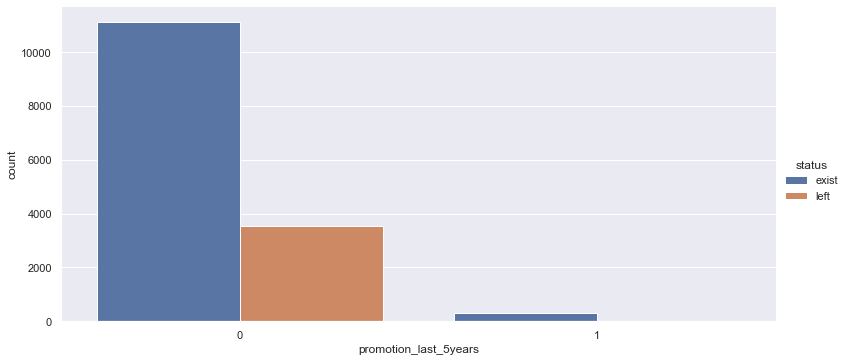

In [37]:
#representing the promotion_last_5years of all employees by status
sns.catplot(x='promotion_last_5years',data=allEmployees,hue='status', kind='count', aspect=13/6)

***NOTE: 4***

The catplot above shows that employees with **0 promotion_last_5years are prone to leave**

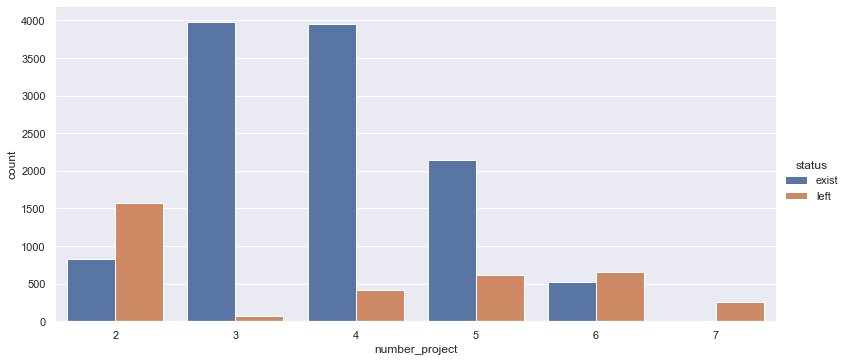

In [38]:
#representing the number_project of all employees by status
sns.catplot(x='number_project',data=allEmployees,hue='status', kind='count', aspect=13/6)

***NOTE: 5***

The catplot above shows that employees with **7 number_project are prone to leave as well as those with projects below 3**

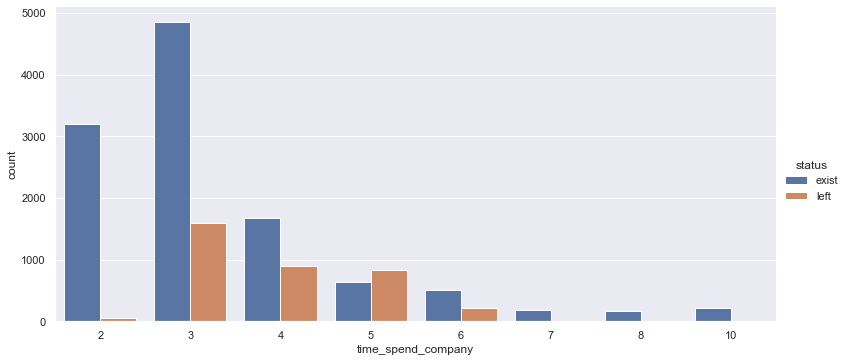

In [39]:
#representing the time_spend_company of all employees by status
sns.catplot(x='time_spend_company',data=allEmployees,hue='status', kind='count', aspect=13/6)

***NOTE: 6***

The catplot above shows that employees with **time_spend_company ranging from 3 to 6 are prone to leave**

<AxesSubplot:xlabel='average_monthly_hours', ylabel='Density'>

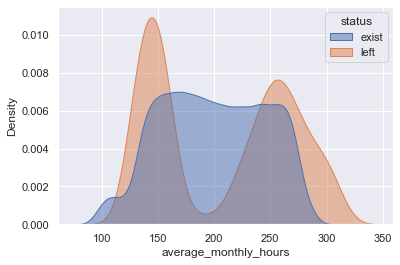

In [40]:
#representing the average_monthly_hours of all employees by status
sns.kdeplot(data=allEmployees, x="average_monthly_hours", hue="status",fill=True, common_norm=False, alpha=0.5)

***NOTE: 7***

The kdeplot above shows that employees with **average_monthly_hours below ~155 and above ~245 are prone to leave**

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

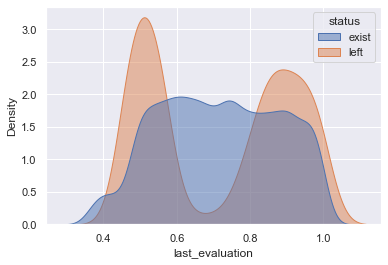

In [41]:
#representing the last_evaluation of all employees by status
sns.kdeplot(data=allEmployees, x="last_evaluation", hue="status",fill=True, common_norm=False,alpha=0.5)

***NOTE: 8***

The kdeplot above shows that employees with **last_evaluation below ~0.57 and above ~0.82 are prone to leave**

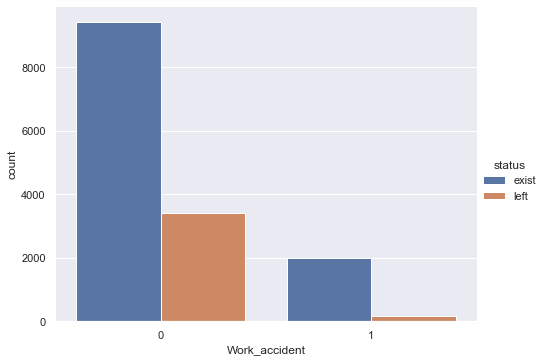

In [42]:
#representing the Work_accident of all employees by status
sns.catplot(x='Work_accident',data=allEmployees,hue='status', kind='count', aspect=8/6)

***NOTE: 9***

The catplot above shows that employees with **0 Work_accident are prone to leave**

### 6. Preparing datasets for Machine Learning 

In [43]:
allEmployees.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [44]:
allEmployees.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [45]:
allEmployees.status.unique()

array(['exist', 'left'], dtype=object)

In [46]:
#creating a dictionary to map the dept column 
dept_map = {'sales':'1', 'accounting':'2', 'hr':'3', 'technical':'4', 'support':'5', 'management':'6',
       'IT':'7', 'product_mng':'8', 'RandD':'9', 'marketing':'10'}

In [47]:
#creating a dictionary to map the salary column 
salary_map = {'low':'1', 'medium':'2', 'high':'3'}

In [48]:
#creating a dictionary to map the status column 
status_map = {'exist':'0', 'left':'1'}

In [49]:
#Creating new dept_num,salary_num,status_num columns with new int values mapped from the respective dictionaries
allEmployees['dept_num'] = allEmployees['dept'].map(dept_map).astype(int)
allEmployees['salary_num'] = allEmployees['salary'].map(salary_map).astype(int)
allEmployees['status_num'] = allEmployees['status'].map(status_map).astype(int)

In [50]:
#new allEmployees columns
allEmployees.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'status', 'dept_num',
       'salary_num', 'status_num'],
      dtype='object')

In [51]:
#filtering out columns with numerical values
allemployeesReason = allEmployees[['satisfaction_level','last_evaluation','number_project','average_monthly_hours',
                                   'time_spend_company','Work_accident','promotion_last_5years','dept_num',
                                   'salary_num','status_num']]

#shuffling the rows in the allemployeesReason dataframe to create randomness and eliminate employee recruitment  order
allemployeesReason = allemployeesReason.sample(frac=1)

allemployeesReason

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_num,salary_num,status_num
3195,0.45,0.53,2,138,3,0,0,2,2,1
9560,0.20,0.60,5,261,8,0,0,1,2,0
1801,0.11,0.79,6,264,4,0,0,4,1,1
5409,0.23,0.70,4,233,2,0,0,6,2,0
3066,0.50,0.48,3,163,4,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1603,0.59,0.57,2,156,2,0,0,1,1,0
8717,0.71,0.59,4,143,2,0,0,3,2,0
2618,0.45,0.57,2,148,3,0,0,10,3,1
1729,0.86,0.95,4,270,5,0,0,5,1,1


### Preparing data needed for a LogisticRegression Model

In [52]:
#Creating 1D array of the targets (0:exist and 1:left)
Y = np.array(allemployeesReason.status_num)
Y

array([1, 0, 1, ..., 1, 1, 1])

In [53]:
#Creating X train inputs excluding the target column(status_num) 
X = allemployeesReason.drop('status_num', axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_num,salary_num
3195,0.45,0.53,2,138,3,0,0,2,2
9560,0.20,0.60,5,261,8,0,0,1,2
1801,0.11,0.79,6,264,4,0,0,4,1
5409,0.23,0.70,4,233,2,0,0,6,2
3066,0.50,0.48,3,163,4,0,0,2,1
...,...,...,...,...,...,...,...,...,...
1603,0.59,0.57,2,156,2,0,0,1,1
8717,0.71,0.59,4,143,2,0,0,3,2
2618,0.45,0.57,2,148,3,0,0,10,3
1729,0.86,0.95,4,270,5,0,0,5,1


In [54]:
# Creating a  LogisticRegression model
log_model = LogisticRegression()

# Fiting our data
log_model.fit(X,Y)

# Checking our accuracy
accuracy = log_model.score(X,Y)
accuracy

C:\Users\o876\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7927861857457164

In [55]:
print('\n Model Accuracy: {0:.2f}%'.format(accuracy*100.))


 Model Accuracy: 79.28%


-We have got  **79% Model Accuracy**. To test its accuracy, we need to **compare it to the original Y data:**

Lets Take the **mean of the Y data**, given it's in the format 1 or 0, the **mean calculates the percentage of employees likely to leave.**

In [56]:
# percentage of employees likely to leave
Y.mean()

0.2380825388359224

Meaning, if our model guessed "exist" (0), 1-0.24= 0.76 accuracy or 76% accuracy would be expected. 

However it registers an error of 3% which is not too bad!

**Checking coefficients of our model to identify the stronger predictors.**

In [57]:
coef_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coef_df

,0,1
0,satisfaction_level,[-4.143629067394775]
1,last_evaluation,[0.8331160085746978]
2,number_project,[-0.3189188593219092]
3,average_monthly_hours,[0.004174979022946938]
4,time_spend_company,[0.25764615215439546]
5,Work_accident,[-1.5874568205699653]
6,promotion_last_5years,[-0.8780180139467523]
7,dept_num,[-0.032397567448851035]
8,salary_num,[-0.6964853095178725]


***Note 10:***

-This shows that the higher the **promotion_last_5years(stronger) and salary_num, the more the possibility of an employee to leave decreases.**

-However the higher the **last_evaluation(stronger), the more the possibility of an employee to leave increases.**

###  6.1 Preparing datasets for Deep Learning Prediction of Leaving Employees

In [58]:
existing

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,exist
1,2002,0.82,0.67,2,202,3,0,0,sales,low,exist
2,2003,0.45,0.69,5,193,3,0,0,sales,low,exist
3,2004,0.78,0.82,5,247,3,0,0,sales,low,exist
4,2005,0.49,0.60,3,214,2,0,0,sales,low,exist
...,...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high,exist
11424,14208,0.74,0.95,5,266,10,0,1,management,high,exist
11425,14209,0.85,0.54,3,185,10,0,1,management,high,exist
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,exist


In [59]:
left

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,left


In [60]:
#Shuffling the existing to randomly select a dataset to balance with the Left dataset
existing = existing.sample(frac = 1) 
existing

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
2896,4897,0.50,0.78,6,138,3,0,0,sales,medium,exist
11173,13957,0.27,0.76,4,108,10,0,0,sales,medium,exist
9015,11016,0.64,0.56,3,257,6,0,0,marketing,medium,exist
2786,4787,0.73,0.93,4,162,2,1,0,support,medium,exist
10416,13200,0.32,0.86,4,266,4,0,0,RandD,low,exist
...,...,...,...,...,...,...,...,...,...,...,...
1132,3133,0.50,0.73,3,148,3,0,0,accounting,low,exist
3689,5690,0.21,0.58,5,197,4,0,0,technical,low,exist
7076,9077,0.87,0.59,4,202,3,0,0,IT,medium,exist
6538,8539,0.99,0.55,3,197,2,0,0,IT,medium,exist


In [61]:
#balance_exist dataset to be used with the left dataset to create balanced data with equal 1's and 0's for deep learning 
balance_exist = existing.iloc[:3571]
balance_exist

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
2896,4897,0.50,0.78,6,138,3,0,0,sales,medium,exist
11173,13957,0.27,0.76,4,108,10,0,0,sales,medium,exist
9015,11016,0.64,0.56,3,257,6,0,0,marketing,medium,exist
2786,4787,0.73,0.93,4,162,2,1,0,support,medium,exist
10416,13200,0.32,0.86,4,266,4,0,0,RandD,low,exist
...,...,...,...,...,...,...,...,...,...,...,...
6676,8677,0.60,0.88,4,175,3,0,0,support,low,exist
7896,9897,0.76,0.66,5,206,2,0,0,support,medium,exist
4229,6230,0.74,0.66,3,257,3,0,0,support,low,exist
4523,6524,0.53,0.79,3,206,3,0,0,technical,medium,exist


In [62]:
#the remainder of the existing dataset to be used as a new dataset for prediction with the model
predict_on_exist = existing.iloc[3572:]

#trancating off the EmpId and status
predict_on_exist = predict_on_exist.iloc[:,1:-1]

#mapping the dept and salary object columns with numeric values in created dictionaries dept_map and salary_map
predict_on_exist['dept_num'] = predict_on_exist['dept'].map(dept_map).astype(int)
predict_on_exist['salary_num'] = predict_on_exist['salary'].map(salary_map).astype(int)

#droping the dept and salary columns to eliminate non-numeric values
predict_on_exist.drop(['dept','salary'], axis = 1, inplace=True)

#removing string column headers to create a numeric dataset
predict_on_exist.columns = range(predict_on_exist.shape[1])
predict_on_exist

,0,1,2,3,4,5,6,7,8
7391,0.62,0.63,5,153,6,0,0,4,2
5963,0.21,0.76,6,219,4,1,0,1,2
10080,0.19,0.63,4,278,6,0,0,4,1
10180,0.94,0.69,5,145,2,0,0,8,2
9580,0.51,0.86,3,182,10,0,0,1,1
...,...,...,...,...,...,...,...,...,...
1132,0.50,0.73,3,148,3,0,0,2,1
3689,0.21,0.58,5,197,4,0,0,4,1
7076,0.87,0.59,4,202,3,0,0,7,2
6538,0.99,0.55,3,197,2,0,0,7,2


In [63]:
#Saving the dataset, to be used later during prediction with the created model
predict_on_exist.to_csv('predict_on_exist.csv', index=False)

#### creating a balanced numeric dataset for training, validation and testing the model 

In [64]:
#Creating a shuffled-rows-balanced-dataset for the creation of train,validation and test datasets of the model
allEmployees_balanced = pd.concat([balance_exist,left.sample(frac = 1) ]) #balance_exist is already shuffled on creation

#mapping the dept, salary, status columns with numeric values in respective dictionaries dept_map,salary_map,status_map 
allEmployees_balanced['dept_num'] = allEmployees_balanced['dept'].map(dept_map).astype(int)
allEmployees_balanced['salary_num'] = allEmployees_balanced['salary'].map(salary_map).astype(int)
allEmployees_balanced['status_num'] = allEmployees_balanced['status'].map(status_map).astype(int)

#droping the dept and salary columns to eliminate non-numeric values
allEmployees_balanced.drop(['dept','salary','status'], axis = 1, inplace=True)

#shuffling the emerging dataset to mix-up the 0's and 1's
allEmployees_balanced = allEmployees_balanced.sample(frac=1)

#removing string column headers to create a numeric dataset
allEmployees_balanced.columns = range(allEmployees_balanced.shape[1])

allEmployees_balanced

,0,1,2,3,4,5,6,7,8,9,10
4512,6513,0.23,0.74,5,219,4,0,0,1,2,0
2674,12675,0.46,0.50,2,157,3,0,0,7,1,1
1909,1910,0.14,0.75,4,277,5,1,0,1,2,1
1852,1853,0.39,0.49,2,142,3,0,0,1,1,1
159,160,0.45,0.45,2,132,3,0,0,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...
979,980,0.11,0.95,6,271,4,0,0,7,1,1
2194,4195,0.59,0.90,3,146,3,0,0,9,2,0
245,246,0.45,0.46,2,155,3,0,0,1,1,1
757,2758,0.50,0.68,4,161,3,0,0,1,2,0


In [65]:
#Saving the dataset, to be used later during creation of the train,validation and test datasets of the model
allEmployees_balanced.to_csv('allEmployees_balanced.csv', index=False)